# Deep Neural Networks Laboration

### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

In [1]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

### **Your task**
Your task is to make a DNN that can classify benign or malicious networks attacks using the Mirai dataset (see below).

**You need to answer all the questions in the notebook.** Also, for all classification tasks that you will explore, you should always answer these two questions:
- How good classification accuracy can a naive classifier obtain? The naive classifier will assume that all examples belong to one class.
- What is random chance classification accuracy if you randomly guess the label of each (test) example? For a balanced dataset and binary classification this is easy (50%), but in many cases it is more complicated and a Monte Carlo simulation may be required to estimate random chance accuracy.

If your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.

If the training is too slow on your own computer, use the smaller datasets (*half or *quarter).

Dense networks are not optimal for tabular datasets like the one used here, but here the main goal is to explore and get a a hands-on experience with deep learning.

# Part 1: The Dataset #

Data used in this laboration are from the [Kitsune Network Attack Datase](https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset). We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

### **1.1 Load the data**
Complete and run the following cell to to load the the `Mirai_data.npy` and the `Mirai_labels.npy` files and remove the first 24 covariances to make the classification task harder.

In [2]:
import os
from numpy import genfromtxt # ! Not needed if you load data from numpy arrays !
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
# Load the dataset
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Remove the first 24 covariates (columns)
X = X[:, 24:]
# Y =
# I don't know whether I need to change


# # I decide to use 2% dataset
# indices = np.random.permutation(len(X))

# shuffled_X = X[indices]
# shuffled_Y = Y[indices]

# num_rows = int(0.5 * len(X))
# X = shuffled_X[:num_rows]
# Y = shuffled_Y[:num_rows]

# Print the size of the covariates and labels
print(X.shape)
print(Y.shape)
# ============================================

(764137, 92)
(764137,)


### **1.2 Explore the data (NaNs)**
It is common to have NaNs (not a number) in the data, lets check for it.

In [3]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
data_nan = np.isnan(X)
# Fist check for NaNs in the data and then in the labels
label_nan = np.isnan(Y)
# Print the number of NaNs in the covariates
print(np.sum(data_nan))
print(np.sum(label_nan))

# ============================================

0
0


### **1.3 Data preprocessing: normalization**

In [4]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Convert covariates to floats
X = X.astype(float)
# Convert labels to integers
Y = Y.astype(int)

# Remove mean of each covariate (column)
X = X - np.mean(X, axis=0)

# Divide each covariate (column) by its standard deviation
X = X / np.std(X, axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print(np.mean(np.mean(X, axis=0)))
print(np.mean(np.std(X, axis=0)))
# ============================================


-1.7994775950632285e-13
0.9999999999996458


### **1.4 Data split**
Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables:
- `Xtrain` and `Ytrain`  (70% of the dataset)
- `Xtemp` and `Ytemp`  (30% of the dataset)

We use a function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details)

In [5]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# split the original dataset into 70% Training and 30% Temp
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the number of examples of each class, for the training data and the remaining 30%
train_classes, train_count = np.unique(Ytrain, return_counts=True)
rest_classes, rest_count = np.unique(Ytemp, return_counts=True)
train_classes_count = dict(zip(train_classes, train_count))
rest_classes_count = dict(zip(rest_classes, rest_count))
print('The number of examples of each class:')
print(train_classes_count)
print(rest_classes_count)


# ============================================

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

The number of examples of each class:
{0: 85248, 1: 449647}
{0: 36373, 1: 192869}
Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).


Now split your non-training data (`Xtemp`, `Ytemp`) into 50% validation (`Xval`, `Yval`) and 50% testing (`Xtest`, `Ytest`), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

In [6]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# split the remaining 30% into 50% Validation and 50% Test
Xval, Xtest, Yval, Ytest = train_test_split(X, Y, test_size=0.5, random_state=42)

# ============================================

print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

The validation set has size 382068
The test set has size 382069


#### **<span style="color:red">Questions</span>**
1. Do all variables (`Xtrain`,`Ytrain`), (`Xval`,`Yval`), (`Xtest`,`Ytest`) have the shape that you expect?
2. Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Note, that if your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.


#### **<span style="color:green">Answer</span>**
1. Yes
2. If the output of naive classifier is 1 for each train data item, the accuracy of that would be 84%.

In [7]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print('No GPU available.')

No GPU available.


# Part 2: DNN classification
In this next section you will define utilities for building the deep learning networks that will be used later and for visualizing the model training. You will also train several model experimenting with different model architecture configurations and methods for model regularization.

### **2.1 Build DNN model**
Implement the `build_DNN` and `plot_results` functions in the `utilities.py` file. Note that for the changes in the `utilities.py` definitions to be visible by the notebook, you need to save the file.

Here are some relevant functions that you should use in `build_DNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function.
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

After defining the`build_DNN` function use it to create the your first DNN classifier. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Make sure that the last layer always has a sigmoid activation function (why?).

**The sigmoid’s output can be directly interpreted as the likelihood ("probability") that an input belongs to the positive class. The sigmoid provides smooth, non-zero gradients for inputs away from the extremes, which aids the optimization process during training - that's why.**

In [ ]:
from utilities import build_DNN, plot_results
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import a suitable loss function from keras.losses and use as input to the build_DNN function.
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow_probability


n_hidden_layers = 2
n_hidden_units = 20 # 20 for each
loss = BinaryCrossentropy()
# Build a DNN model following the specifications above
model = build_DNN(input_shape=(Xtrain.shape[1],), n_hidden_layers=n_hidden_layers, n_hidden_units=n_hidden_units, loss=loss)
# input_shape, n_hidden_layers, n_hidden_units, loss
# ============================================

### **2.2 Train DNN model**

Time to train the DNN!
Start simple with 2 hidden layers with 20 nodes each.

Build set the different hyper-parameters, build the model and run the training. Use the following training and hyper-parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.1`

Make sure that you are using learning rate 0.1 !

### 2 hidden layers with 20 nodes each

In [ ]:
# Setup some training and hyper-parameters
batch_size = 20
# batch_size = 64
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (X.shape[1],)
loss = BinaryCrossentropy()

# Build the model
model1 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size)
# ============================================

Epoch 1/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9089 - loss: 0.1723 - val_accuracy: 0.9188 - val_loss: 0.1494
Epoch 2/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9202 - loss: 0.1464 - val_accuracy: 0.9128 - val_loss: 0.1444
Epoch 3/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9246 - loss: 0.1393 - val_accuracy: 0.9268 - val_loss: 0.1329
Epoch 4/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9280 - loss: 0.1332 - val_accuracy: 0.8918 - val_loss: 0.1628
Epoch 5/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9313 - loss: 0.1283 - val_accuracy: 0.9364 - val_loss: 0.1212
Epoch 6/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9341 - loss: 0.1237 - val_accuracy: 0.9344 - val_loss: 0.1216
Epoch 7/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.9352 - loss: 0.1213 - val_accuracy: 0.9382 - val_loss: 0.1209
Epoch 8/20
26745/26745 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

19104/19104 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9416 - loss: 0.1097
Test loss: 0.1094
Test accuracy: 0.9414


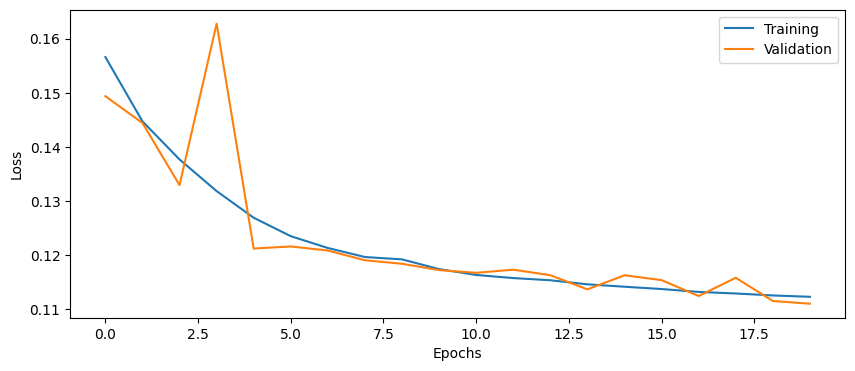

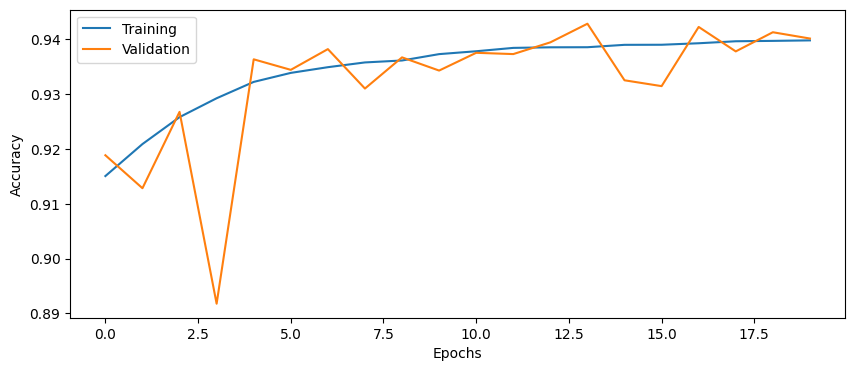

In [ ]:
from utilities import plot_results

# Plot the history from the training run
plot_results(history1)

**If the baseline accuracy of the naive classifier is 84% (first question that should be answered everywhere) and we assume that the expected accuracy of a random chance classifier is approximately equal to the naive classifier, then this classifier performed better than both naive and random classifier.**

#### **<span style="color:red">Questions</span>**

3. What happens if you add several Dense layers without specifying the activation function?

4. How are the weights in each dense layer initialized as default? How are the bias weights initialized?

#### **<span style="color:green">Answers</span>**
3. When there is no any specification about activate function, it would be Sigmoid function as default. But based on the performance, there is also no any exception happened.
4. The weights are initialized uniformly. The bias are initialized by all zeros.


### **2.2 Adressing class imbalance**

This dataset is rather unbalanced with the majority of the samples belonging to class=1. We need to define class weights so that the training pays more attention to the class with fewer samples. We use the [`compute_class_weight`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) function from `scikit-learn`.

You need to call the function something like this
```python
class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )
```

otherwise it will through an error.

In [ ]:
from sklearn.utils import class_weight

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Calculate class weights
value1, value2 = class_weight.compute_class_weight(class_weight = "balanced",
                                                                   classes = train_classes,
                                                                   y =Ytrain )

# Print the class weights
print("Classes weight is:")
print(value1)
print(value2)
# ============================================

# Convert class weights into a dictionary that can be used as input to the model.fit() function

class_weights = {0: value1,
                1: value2}


Classes weight is:
3.1372876783033035
0.5947943609097803


### Train a model using class weights. 2 hidden layers with 20 nodes each


In [ ]:

# Setup some training and hyper-parameters
batch_size = 10000
# batch_size = 64
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (92,)
loss = BinaryCrossentropy()


# Build the model
model2 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate)

# Train the model, provide training data and validation data
history2 = model2.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)
# ============================================

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4905 - loss: 0.6661 - val_accuracy: 0.8801 - val_loss: 0.5297
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8803 - loss: 0.4784 - val_accuracy: 0.8799 - val_loss: 0.3729
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8806 - loss: 0.3249 - val_accuracy: 0.8799 - val_loss: 0.3056
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8803 - loss: 0.2581 - val_accuracy: 0.8800 - val_loss: 0.2810
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8805 - loss: 0.2337 - val_accuracy: 0.8801 - val_loss: 0.2708
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8804 - loss: 0.2220 - val_accuracy: 0.8810 - val_loss: 0.2655
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8818 - loss: 0.2157 - val_accuracy: 0.8844 - val_loss: 0.2615
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8868 - loss: 0.2097 - val_accuracy: 0.8884 - val_loss

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9024 - loss: 0.2310
Test loss: 0.2318
Test accuracy: 0.9020


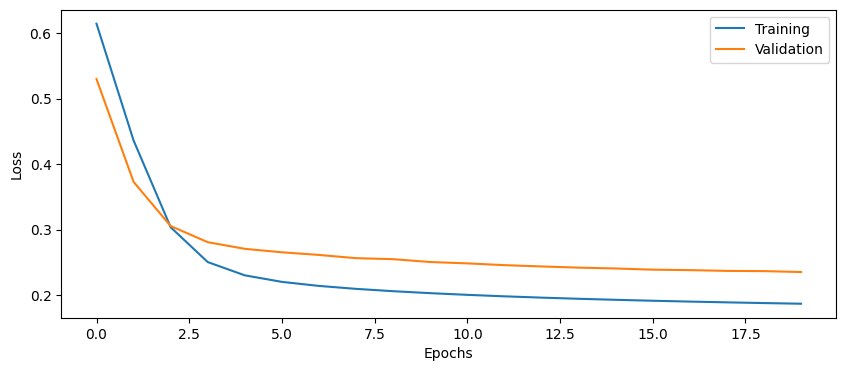

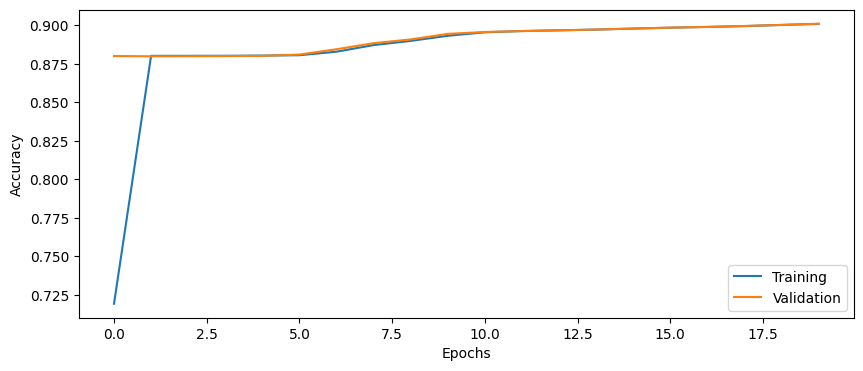

In [ ]:
plot_results(history2)

**Referring to both questions in the beginning, the performance is slightly worse with this batch size, but still better than both naive and random classifier**

In [ ]:
# record the processing time
# when the batch_size=100
epochs=1
batch_size = 100
model3 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate)
# Train the model, provide training data and validation data
history3 = model3.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)
# when the batch_size=1000
batch_size = 1000
model4 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate)
# Train the model, provide training data and validation data
history4 = model4.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)
# when the batch_size=10000
batch_size = 10000
# Build the model
model5 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate)
# Train the model, provide training data and validation data
history5 = model5.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)


5349/5349 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8863 - loss: 0.2398 - val_accuracy: 0.9146 - val_loss: 0.2126
535/535 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8016 - loss: 0.4423 - val_accuracy: 0.8904 - val_loss: 0.2536
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8653 - loss: 0.6605 - val_accuracy: 0.8805 - val_loss: 0.5901


In [ ]:
# Question 10
print(model2.summary())
model5 = build_DNN(n_hidden_layers=2, n_hidden_units=50, loss=loss, input_shape=input_shape, learning_rate=learning_rate)
# Train the model, provide training data and validation data
history5 = model5.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)
print(model5.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 20)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,303 (9.00 KB)

 Trainable params: 2,301 (8.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8698 - loss: 0.6351 - val_accuracy: 0.8814 - val_loss: 0.4677


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 50)                  │           4,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,253 (28.34 KB)

 Trainable params: 7,251 (28.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


### **Additional questions**
#### **<span style="color:red">Questions</span>**

5. Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

6. What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results.

7. How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

8. What limits how large the batch size can be?

9.  Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
10. How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()
   
#### **<span style="color:green">Answers</span>**
5. Using the entire dataset for training may result in insufficient GPU memory capacity, and coupled with the computation of gradients, the computational burden on the GPU will also increase.

6. The processing time for training one epoch when the batch size was set as 100, 1000, 10,000: 20s, 3s, 3s. As for the reason about the gap among them under the same size of data set is that: The smaller batch size means the more batches, leading to the more gradient calculation and update.

7. For each epoch, the update times of weights is the number of batches: 5439 for batch_size=100, 535 for 1000, 54 for 10,000.

8. The limit is the size of train data, equaling input the whole train data set into model to train.

9. Learning rate should be smaller when the batch size is smaller, because, the update would be more frequent when the batch size is smaller. Therefore, the learning rate needs to be reduced so that the parameter updates become smaller and thus remain stable.

10.  There are 2,301 and 7,251 weights in the model2 and model5, whose nodes are 20 and 50 for each Dense layer.

And, in all of the cases the performance is better than both naive and random classifier. In case of weighting the point is bringing both classifiers to 50%, in this case the performance might be even better

### **2.3 Model regularization**

In the following sections you will explore methods for model normalization, namely `BatchNormalization` and `Dropout`, and also look at the impact of ofter activation functions and optimization algorithms.
#### **2.3.1 Batch normalization**

Now add batch normalization after each hidden dense layer in `build_DNN`.

See the [documentation](https://keras.io/layers/normalization/) for information about how to call the function.

#### **<span style="color:red">Questions</span>**
11. Why is batch normalization important when training deep networks?

#### **<span style="color:green">Answers</span>**
11. In deep networks, the distribution of inputs to each layer is constantly changing as the parameters of the previous layers are updated, causing learning of subsequent layers to become difficult. Batch normalization would reduce the variability of the input distribution. Besides, batch normalization would force inputs to have fixed mean and variance, preventing the activation values of some layers from becoming too large or too small, thus avoiding gradient explosion or vanish.



### 2 hidden layers, 20 nodes each, class weights and batch normalization

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8748 - loss: 0.4658 - val_accuracy: 0.8943 - val_loss: 0.4168
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8873 - loss: 0.2642 - val_accuracy: 0.9020 - val_loss: 0.3124
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8921 - loss: 0.2305 - val_accuracy: 0.9059 - val_loss: 0.2587
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8964 - loss: 0.2138 - val_accuracy: 0.9109 - val_loss: 0.2290
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9019 - loss: 0.2043 - val_accuracy: 0.9108 - val_loss: 0.2151
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9052 - loss: 0.1983 - val_accuracy: 0.9105 - val_loss: 0.2123
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.1943 - val_accuracy: 0.9104 - val_loss: 0.2149
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9079 - loss: 0.1902 - val_accuracy: 0.9104 - val_loss

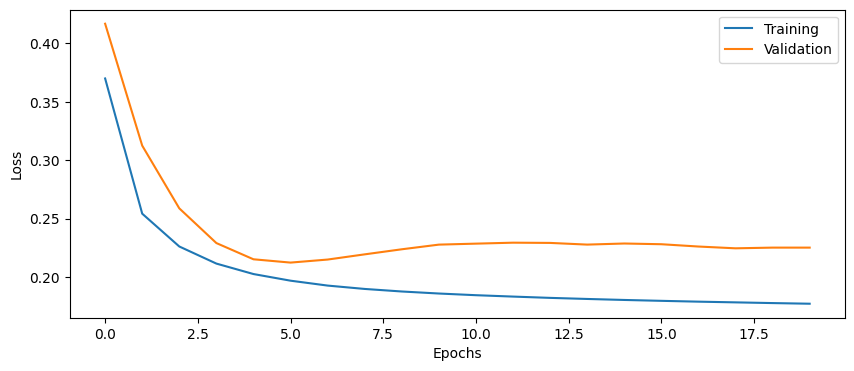

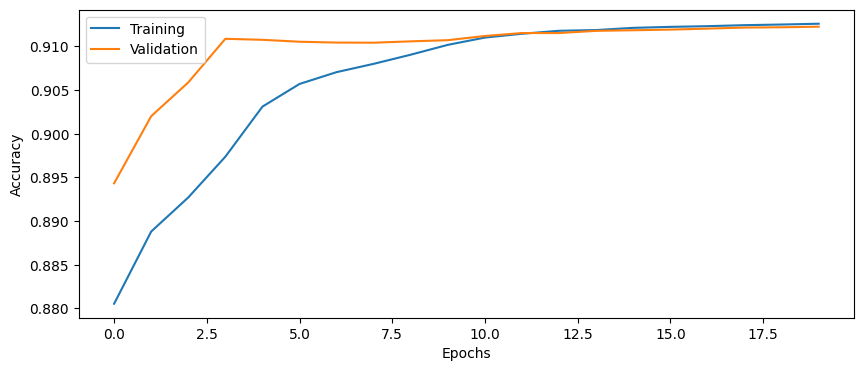

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
epochs=20
# Build the model
model6 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate, use_bn=True)

# Train the model, provide training data and validation data
history6 = model6.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)
# Evaluate model on test data
score = model6.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history6)

Still better than both naive and random classifier

#### **2.3.2 Activation function**

Try changing the activation function in each layer from sigmoid to [ReLU](https://keras.io/api/layers/activations/).

**Note**: the last layer should still have a sigmoid activation function.

### 2 hidden layers, 20 nodes each, class weights, ReLU and no batch normalization

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8087 - loss: 0.4301 - val_accuracy: 0.8855 - val_loss: 0.2773
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8875 - loss: 0.2117 - val_accuracy: 0.8922 - val_loss: 0.2517
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8951 - loss: 0.1934 - val_accuracy: 0.9007 - val_loss: 0.2374
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9023 - loss: 0.1860 - val_accuracy: 0.9049 - val_loss: 0.2347
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9059 - loss: 0.1812 - val_accuracy: 0.9070 - val_loss: 0.2276
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9074 - loss: 0.1787 - val_accuracy: 0.9083 - val_loss: 0.2231
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9083 - loss: 0.1772 - val_accuracy: 0.9091 - val_loss: 0.2232
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9099 - loss: 0.1735 - val_accuracy: 0.9094 - val_loss

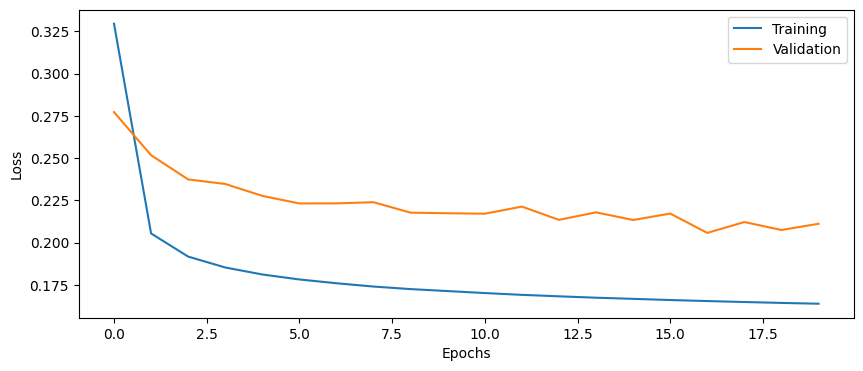

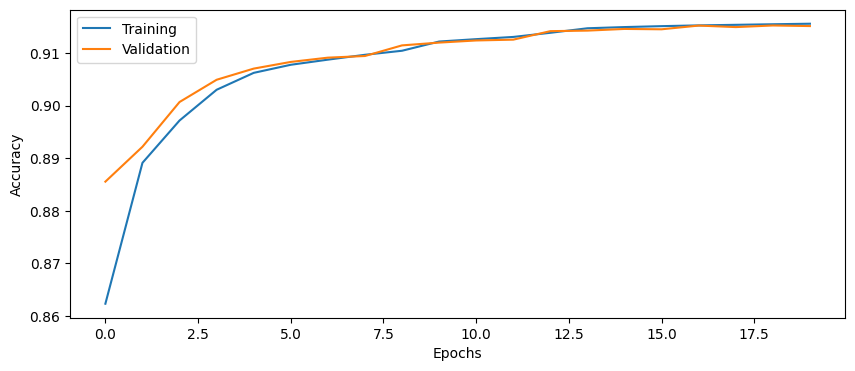

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model7 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate, act_fun="relu")
history7 = model7.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)


# Evaluate model on test data
score = model7.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history7)

Still better than both random classifier and naive classifier

#### **2.3.3 Optimizer**

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from [keras.optimizers](https://keras.io/optimizers/).

### 2 hidden layers, 20 nodes each, class weights, Adam optimizer, no batch normalization, sigmoid activations

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8488 - loss: 0.6746 - val_accuracy: 0.8766 - val_loss: 0.5271
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8781 - loss: 0.4727 - val_accuracy: 0.8791 - val_loss: 0.3832
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8792 - loss: 0.3346 - val_accuracy: 0.8805 - val_loss: 0.3202
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8818 - loss: 0.2685 - val_accuracy: 0.8841 - val_loss: 0.2916
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8853 - loss: 0.2363 - val_accuracy: 0.8907 - val_loss: 0.2706
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8934 - loss: 0.2167 - val_accuracy: 0.8980 - val_loss: 0.2570
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8994 - loss: 0.2048 - val_accuracy: 0.9023 - val_loss: 0.2483
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9032 - loss: 0.1966 - val_accuracy: 0.9058 - val_loss

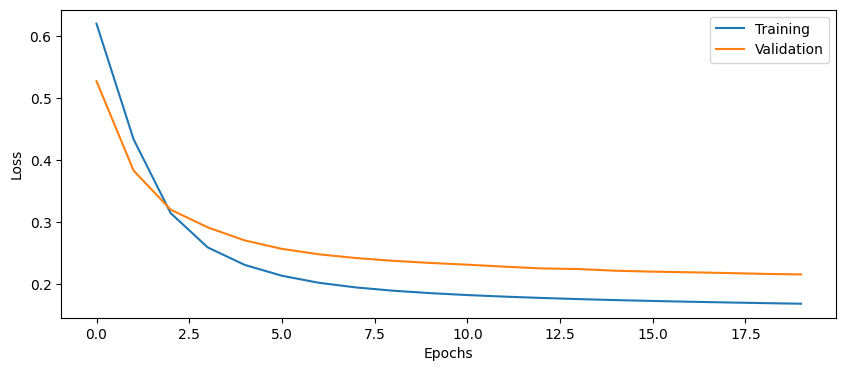

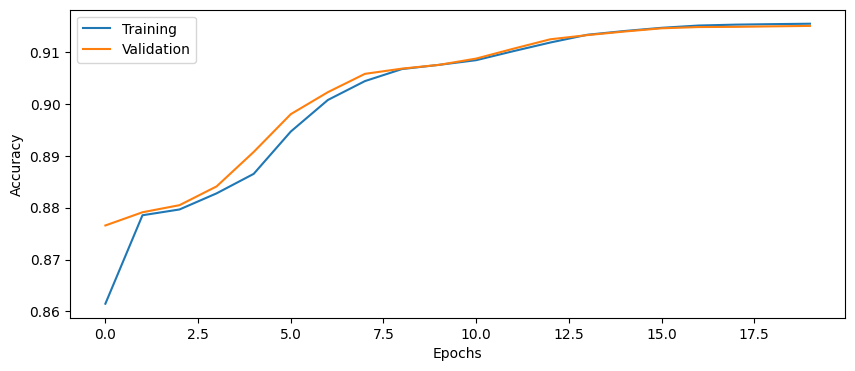

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model8 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate, optimizer="adam")

history8 = model8.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size,class_weight=class_weights)

# Evaluate model on test data
score = model8.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history8)

Still better than both random and naive classifiers

#### 2.3.4 **Dropout regularization**

Dropout is a type of regularization that can improve accuracy for validation and test data. It randomly removes connections to force the neural network to not rely too much on a small number of weights.

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Look at the [documentation](https://keras.io/api/layers/regularization_layers/dropout/) for more information on how to call set this layer.

#### **<span style="color:red">Questions</span>**
12. How does the validation accuracy change when adding dropout?
13. How does the test accuracy change when adding dropout?

#### **<span style="color:green">Answers</span>**
12. Little bit lower than before.
13. Same situation as above.

### 2 hidden layers with 20 nodes each, class weights, dropout, SGD optimizer, no batch normalization and sigmoid activations

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6269 - loss: 0.7388 - val_accuracy: 0.8816 - val_loss: 0.6105
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6552 - loss: 0.6340 - val_accuracy: 0.8824 - val_loss: 0.5179
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7469 - loss: 0.5525 - val_accuracy: 0.8801 - val_loss: 0.4161
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.4727 - val_accuracy: 0.8795 - val_loss: 0.3463
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8284 - loss: 0.4109 - val_accuracy: 0.8795 - val_loss: 0.3111
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8439 - loss: 0.3726 - val_accuracy: 0.8795 - val_loss: 0.2935
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8541 - loss: 0.3447 - val_accuracy: 0.8795 - val_loss: 0.2876
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8606 - loss: 0.3278 - val_accuracy: 0.8795 - val_loss

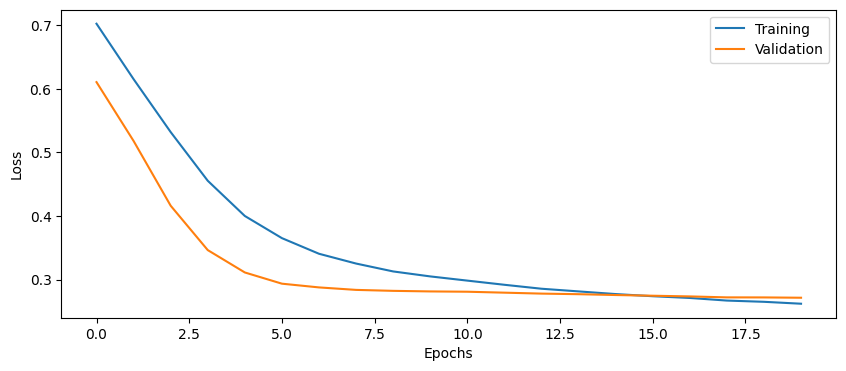

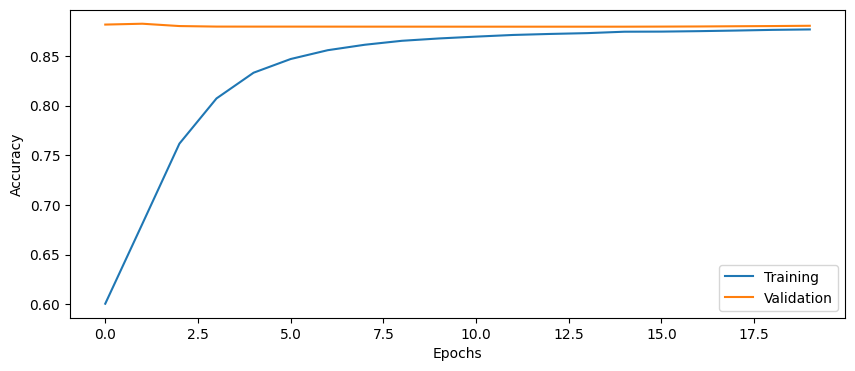

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model9 = build_DNN(n_hidden_layers=2, n_hidden_units=20, loss=loss, input_shape=input_shape, learning_rate=learning_rate, use_dropout=True)

history9 = model9.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
# Evaluate model on test data
score = model9.evaluate(Xtest, Ytest, batch_size=batch_size)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history9)

A bit worse but still outperforming both naive and random classifiers

# Part 3:  Hyper parameter tuning

### **3.1 Manual hyper parameter tuning**
Spend some time (20 to 30 minutes) tuning the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

#### **<span style="color:red">Question</span>**
14. How high classification accuracy can you achieve for the test data? What is your best configuration?
   
#### **<span style="color:green">Answers</span>**
With the configuration described below (10 hidden layers, tiny batch size - 12, ReLU activation, 64 nodes, binary crossentropy, 0.001 in learning rate, 20 epochs and no regularization) the accuracy is pushed towards 0.9417, which is the best result so far. But the training time gets really huge, about 20 minutes, on a Mac M1 it's tenfold. Even if the classifier is good enough (all of the classifiers so far are better than both random and naive classifiers), one has to be mindful of resource constraints.

Epoch 1/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 148s 3ms/step - accuracy: 0.8783 - loss: 0.3007 - val_accuracy: 0.9128 - val_loss: 0.1564
Epoch 2/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 148s 3ms/step - accuracy: 0.9173 - loss: 0.1535 - val_accuracy: 0.9173 - val_loss: 0.1502
Epoch 3/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 149s 3ms/step - accuracy: 0.9202 - loss: 0.1476 - val_accuracy: 0.9224 - val_loss: 0.1436
Epoch 4/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 145s 3ms/step - accuracy: 0.9237 - loss: 0.1415 - val_accuracy: 0.9285 - val_loss: 0.1345
Epoch 5/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.9290 - loss: 0.1328 - val_accuracy: 0.9324 - val_loss: 0.1277
Epoch 6/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 147s 3ms/step - accuracy: 0.9322 - loss: 0.1267 - val_accuracy: 0.9365 - val_loss: 0.1200
Epoch 7/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.9336 - loss: 0.1230 - val_accuracy: 0.9367 - val_loss: 0.1195
Epoch 8/20
44575/44575 ━━━━━━━━━━━━━━━━━━━━ 148s 3ms/step - ac

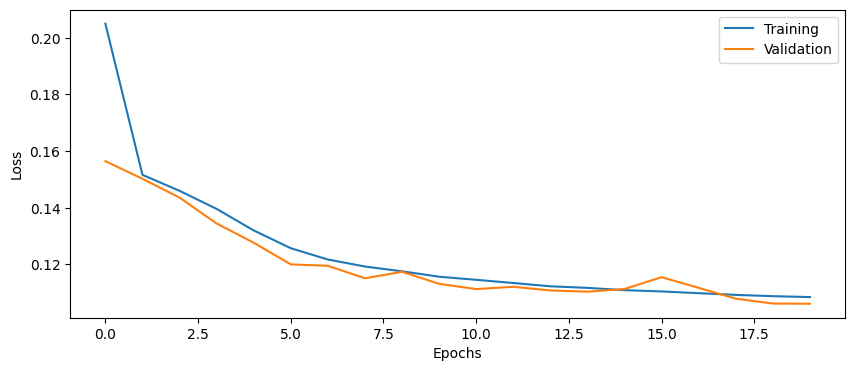

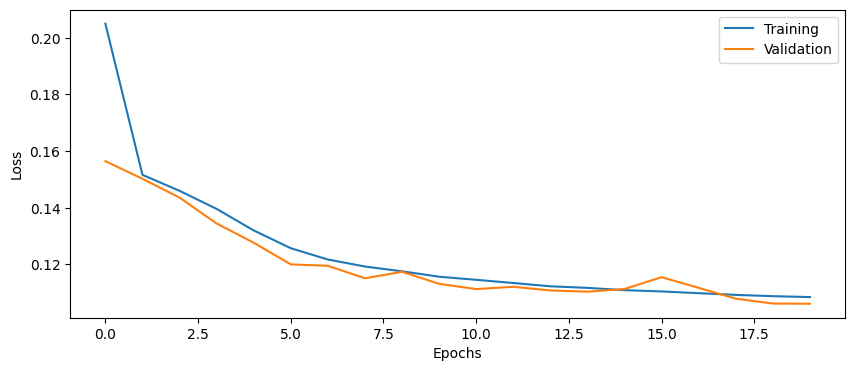

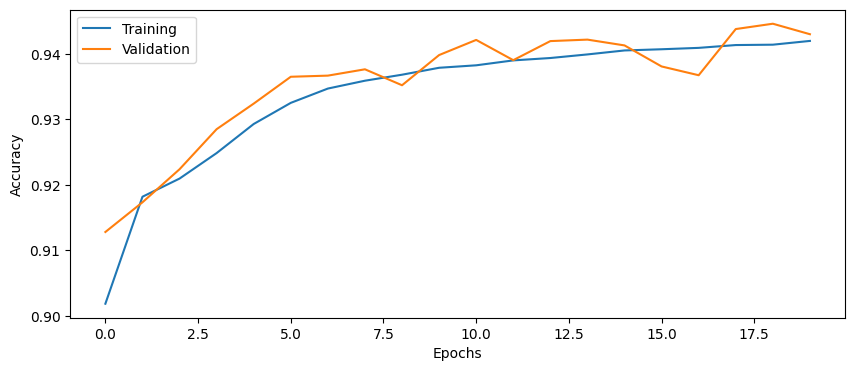

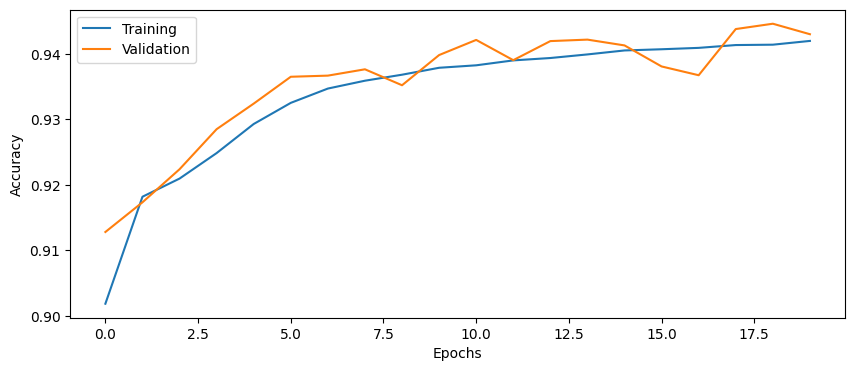

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

n_hidden_layers = 10
n_hidden_units = 64
act_fun = 'relu'
learning_rate = 0.001
batch_size = 12
epochs = 20
loss = BinaryCrossentropy()

# Build and train model
best_model = build_DNN(
    input_shape=(X.shape[1],),
    n_hidden_layers=n_hidden_layers,
    n_hidden_units=n_hidden_units,
    act_fun=act_fun,
    learning_rate=learning_rate,
    loss=loss
)

best_history = best_model.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    epochs=epochs,
    batch_size=batch_size
)
# Evaluate model on test data
best_score = best_model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % best_score[0])
print('Test accuracy: %.4f' % best_score[1])

# Plot the history from the training run
plot_results(best_history)


### **3.2 Automatic hyper parameter search**
The number of hyper parameters that can be tried manually is limited and the process of trying out the different combinations and keeping track of them is time consuming and tedious. Today, there are several libraries available for automatic hyper parameter tuning (see an extensive list [here](https://github.com/balavenkatesh3322/hyperparameter_tuning)). The library that we will use in this lab is `Ray Tune` which can be integrated with many of the deep learning APIs available today (for the full description of the library capabilities see the [documentation](https://docs.ray.io/en/latest/tune/index.html)).


To use the `Ray Tune` functionality we need a function that defines the model training. This will then be used in a wrapper function that defines the hyper parameter search space, the resources available for running the search and the search algorithm.

Start by implementing the `train_DNN` function in the `utilities.py` file (more detailed instructions are available in `utilities.py`). In the cell below, you can set up the search space and a `tune` ray object that takes the `train_DNN`. The tuner will set `train_DNN`, will select a set of hyper parameters and train several models for us (more information [here](https://docs.ray.io/en/latest/tune/key-concepts.html?_gl=1*j3ryje*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQxOTkzNS4xLjAuMTczNjQxOTkzNS4wLjAuMA..#tune-60-seconds)).


`Ray Tune` library provides several types of hyper parameter search algorithms, including random and grid search, and Bayesian optimization. In this lab we will be using the [`Bayesian Optimization`](https://docs.ray.io/en/latest/tune/api/doc/ray.tune.search.bayesopt.BayesOptSearch.html?_gl=1*qcz1fo*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQyNDEyMy4yLjEuMTczNjQyNDI0Ny4wLjAuMA..#ray.tune.search.bayesopt.BayesOptSearch) searching algorithm (additional information about this method can be found [here](https://www.cs.cornell.edu/courses/cs4787/2019sp/notes/lecture16.pdf)).

#### **<span style="color:red">Question</span>**
15. Run the automatic hyper parameter search with range of possible hyper parameter values as in your manual search. Does the automatic search set of parameters match those that you have found?
16. What are the benefits and drawbacks of automatic hyper parameter search?
   
#### **<span style="color:green">Answers</span>**
15 and 16. In this case the automatic search yielded better results than the manual tuning. The accuracy is the highest so far in this configuration, even if it took quite some time for finding the optimal values. Benefits include time and effort saving in the bigger picture, systematic exploration, better performance. Drawbacks include computational cost, complexity in setup and probably the most serious one - risk of overfitting if the validation set is not properly managed, for instance by using cross-validation.

In [ ]:
# import train_DNN
from utilities import train_DNN

# imports for hyperparameter tuning
from ray import tune, train
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.search.bayesopt import BayesOptSearch

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

hyperparameter_space =  {
            "act_fun": tune.choice(["relu", "tanh"]),
            "optimizer": tune.choice(["adam", "sgd"]),
            "use_bn": tune.choice([True, False]),
            "n_hidden_layers": tune.randint(2, 11),
            "n_hidden_units": tune.choice([16, 32, 64, 128]),
            # here define the fixed parameters
            "loss": "binary_crossentropy",
            "learning_rate": 1e-3,
            "use_dropout": False,
            "use_custom_dropout": False,
            "use_variational_layer": False,
            "input_shape": (Xtrain.shape[1],),
        }

training_config = {
            "epochs": 20,
            "batch_size": 64
        }

num_samples = 5

# --------------------------------------------


# Specification of the search algorithm
bayesopt = BayesOptSearch(metric="mean_accuracy", mode="max")

# Definition of the Scheduler. This allows for several models to be trained/stopped/re-started simultaneously
sched = AsyncHyperBandScheduler(
        time_attr="training_iteration", max_t=100, grace_period=20
    )

# Setting up the tuner.
tuner = tune.Tuner(
        tune.with_resources(train_DNN, resources={"cpu": 8, "gpu":0}), # definition of which training function to use and the available resources. Consider adding "gpu":0 to resources if available.
        tune_config=tune.TuneConfig(
            search_alg=bayesopt,
            scheduler=sched,
        ),
        run_config=train.RunConfig(
            name="DNN_hp_tuning",
            stop={"mean_accuracy": 1},
            storage_path='/Users/lrf/PycharmProjects/PythonProject1/2_DNN' # where to save the summary of the hyper parameter tuning.
        ),
    )

# Run the hyper parameter search.
data = (Xtrain, Ytrain, Xval, Yval)
analysis = tune.run(
        tune.with_parameters(train_DNN, data=data, training_config=training_config),
        verbose=1,
        config=hyperparameter_space,
        num_samples=num_samples
        )


2025-03-04 14:34:01,795	INFO worker.py:1812 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2025-03-04 14:34:03,142	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.


+------------------------------------------------------------------+
| Configuration for experiment     train_DNN_2025-03-04_14-34-03   |
+------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator           |
| Scheduler                        FIFOScheduler                   |
| Number of trials                 5                               |
+------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_DNN_2025-03-04_14-34-03
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-03-04_14-34-00_106044_4760/artifacts/2025-03-04_14-34-03/train_DNN_2025-03-04_14-34-03/driver_artifacts`

Trial status: 5 PENDING
Current time: 2025-03-04 14:34:06. Total running time: 0s
Logical resource usage: 0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------

(pid=7814) 2025-03-04 14:34:08.186451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=7814) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=7814) E0000 00:00:1741098848.206342    7814 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=7814) E0000 00:00:1741098848.212421    7814 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Trial train_DNN_b827e_00000 started with configuration:
+------------------------------------------------------------+
| Trial train_DNN_b827e_00000 config                         |
+------------------------------------------------------------+
| act_fun                                               relu |
| input_shape                                          (92,) |
| learning_rate                                        0.001 |
| loss                                   binary_crossentropy |
| n_hidden_layers                                          4 |
| n_hidden_units                                          16 |
| optimizer                                              sgd |
| use_bn                                                True |
| use_custom_dropout                                   False |
| use_dropout                                          False |
| use_variational_layer                                False |
+------------------------------------------------------------

(train_DNN pid=7814) 2025-03-04 14:34:12.134675: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Trial status: 1 RUNNING | 4 PENDING
Current time: 2025-03-04 14:34:36. Total running time: 30s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status     act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00000   RUNNING    relu        sgd           True                       4                 16   0.882762   0.273733        1             23.839         0.904088     0.198856 |
| train_DNN_b827e_00001   PENDING    relu        adam    

(pid=10752) 2025-03-04 14:41:28.592282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=10752) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=10752) E0000 00:00:1741099288.613407   10752 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=10752) E0000 00:00:1741099288.619913   10752 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Trial train_DNN_b827e_00001 started with configuration:
+------------------------------------------------------------+
| Trial train_DNN_b827e_00001 config                         |
+------------------------------------------------------------+
| act_fun                                               relu |
| input_shape                                          (92,) |
| learning_rate                                        0.001 |
| loss                                   binary_crossentropy |
| n_hidden_layers                                          5 |
| n_hidden_units                                          64 |
| optimizer                                             adam |
| use_bn                                               False |
| use_custom_dropout                                   False |
| use_dropout                                          False |
| use_variational_layer                                False |
+------------------------------------------------------------

(train_DNN pid=10752) 2025-03-04 14:41:32.314665: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Trial status: 1 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2025-03-04 14:41:37. Total running time: 7min 30s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00001   RUNNING      relu        adam          False                      5                 64                                                                                 |
| train_DNN_b827e_00000   TER

(pid=13614) 2025-03-04 14:48:34.650321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=13614) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=13614) E0000 00:00:1741099714.670533   13614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=13614) E0000 00:00:1741099714.676643   13614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Trial status: 2 TERMINATED | 3 PENDING
Current time: 2025-03-04 14:48:37. Total running time: 14min 31s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00000   TERMINATED   relu        sgd           True                       4                 16   0.916357   0.152357       20            433.151         0.915806     0.152554 |
| train_DNN_b827e_00001   TERMINATED   r

(train_DNN pid=13614) 2025-03-04 14:48:38.351146: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Trial status: 2 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2025-03-04 14:49:07. Total running time: 15min 1s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00002   RUNNING      tanh        sgd           True                       3                 16   0.886572   0.277955        1             22.37          0.899685     0.210014 |
| train_DNN_b827e_00000   TER

(pid=16455) 2025-03-04 14:55:35.673514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=16455) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=16455) E0000 00:00:1741100135.694278   16455 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=16455) E0000 00:00:1741100135.700525   16455 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Trial status: 3 TERMINATED | 2 PENDING
Current time: 2025-03-04 14:55:38. Total running time: 21min 32s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00000   TERMINATED   relu        sgd           True                       4                 16   0.916357   0.152357       20            433.151         0.915806     0.152554 |
| train_DNN_b827e_00001   TERMINATED   r

(train_DNN pid=16455) 2025-03-04 14:55:39.490920: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Trial status: 3 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-03-04 14:56:08. Total running time: 22min 2s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00003   RUNNING      tanh        adam          False                      2                 64   0.921041   0.144706        1            19.8167         0.93001      0.131512 |
| train_DNN_b827e_00000   TER

(pid=19103) 2025-03-04 15:01:54.867701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=19103) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=19103) E0000 00:00:1741100514.889133   19103 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=19103) E0000 00:00:1741100514.895495   19103 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Trial train_DNN_b827e_00004 started with configuration:
+------------------------------------------------------------+
| Trial train_DNN_b827e_00004 config                         |
+------------------------------------------------------------+
| act_fun                                               relu |
| input_shape                                          (92,) |
| learning_rate                                        0.001 |
| loss                                   binary_crossentropy |
| n_hidden_layers                                          5 |
| n_hidden_units                                          64 |
| optimizer                                              sgd |
| use_bn                                               False |
| use_custom_dropout                                   False |
| use_dropout                                          False |
| use_variational_layer                                False |
+------------------------------------------------------------

(train_DNN pid=19103) 2025-03-04 15:01:58.646591: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2025-03-04 15:02:09. Total running time: 28min 3s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       act_fun     optimizer     use_bn       n_hidden_layers     n_hidden_units        acc       loss     iter     total time (s)     val_accuracy     val_loss |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_DNN_b827e_00004   RUNNING      relu        sgd           False                      5                 64                                                                                 |
| train_DNN_b827e_00000   TERMINATED   re

2025-03-04 15:08:30,931	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_DNN_2025-03-04_14-34-03' in 0.0045s.



Trial train_DNN_b827e_00004 completed after 20 iterations at 2025-03-04 15:08:30. Total running time: 34min 24s
+------------------------------------------------+
| Trial train_DNN_b827e_00004 result             |
+------------------------------------------------+
| checkpoint_dir_name                            |
| time_this_iter_s                       19.4582 |
| time_total_s                           392.197 |
| training_iteration                          20 |
| mean_accuracy                          0.93209 |
| mean_loss                              0.13089 |
| val_accuracy                           0.93249 |
| val_loss                               0.12994 |
+------------------------------------------------+

Trial status: 5 TERMINATED
Current time: 2025-03-04 15:08:30. Total running time: 34min 24s
Logical resource usage: 8.0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------

In [ ]:
# Show the best hyper parameter configuration that was found
best_configuration = analysis.get_best_config(metric="mean_accuracy", mode='max')
for k, v in best_configuration.items():
    print(f"{k}: {v}")

# Print its accuracy
analysis_df = analysis.dataframe()
print(f'\nBest configuration accuracy: {analysis_df.iloc[analysis_df["mean_accuracy"].idxmax()]["mean_accuracy"]}')

act_fun: tanh
optimizer: adam
use_bn: False
n_hidden_layers: 2
n_hidden_units: 64
loss: binary_crossentropy
learning_rate: 0.001
use_dropout: False
use_custom_dropout: False
use_variational_layer: False
input_shape: (92,)

Best configuration accuracy: 0.9437459707260132


And, all of it is better than naive and random classifiers

# Part 4: Uncertainty quantification

In the next sections you will explore three methods for model uncertainty estimation:
- Monte Carlo dropout where we take advantage of the dropout layer during inference time.
- Cross validation where we train several models on different splits of data.
- Bayesian neural networks (BNN) where we modify our model definition to allow the model to learn distributions over weights and the output.

**!Note**: through the next sections, use your best model configuration that you found through hyper parameter tuning (either manual or automatic).

### **4.1 Dropout uncertainty**

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this [paper](http://proceedings.mlr.press/v48/gal16.pdf)

To achieve this, we need to redefine the Keras Dropout. This was already done for you and it is available in `utilities.py` under `myDropout`. Adapt the `build_DNN` function to two boolean arguments, use_dropout and use_custom_dropout; add a standard Dropout layer if use_dropout is true, add a `myDropout` layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on.


In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

from utilities import build_DNN

# Your best training parameters
batch_size = 64
epochs = 20
input_shape = (Xtrain.shape[1],)
loss = "binary_crossentropy"
learning_rate = 0.001

# Build and train model
model10 = build_DNN(n_hidden_layers=2, n_hidden_units=64, loss=loss, input_shape=input_shape, learning_rate=learning_rate, optimizer="adam", use_bn = False, use_custom_dropout=True, act_fun="tanh")

history10 = model10.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/20
8358/8358 [==============================] - 38s 4ms/step - loss: 0.1647 - accuracy: 0.9129 - val_loss: 0.1587 - val_accuracy: 0.9160
Epoch 2/20
8358/8358 [==============================] - 34s 4ms/step - loss: 0.1568 - accuracy: 0.9173 - val_loss: 0.1566 - val_accuracy: 0.9177
Epoch 3/20
8358/8358 [==============================] - 34s 4ms/step - loss: 0.1555 - accuracy: 0.9182 - val_loss: 0.1561 - val_accuracy: 0.9180
Epoch 4/20
8358/8358 [==============================] - 34s 4ms/step - loss: 0.1552 - accuracy: 0.9186 - val_loss: 0.1555 - val_accuracy: 0.9180
Epoch 5/20
8358/8358 [==============================] - 34s 4ms/step - loss: 0.1547 - accuracy: 0.9191 - val_loss: 0.1553 - val_accuracy: 0.9185
Epoch 6/20
8358/8358 [==============================] - 35s 4ms/step - loss: 0.1542 - accuracy: 0.9194 - val_loss: 0.1550 - val_accuracy: 0.9196
Epoch 7/20
8358/8358 [==============================] - 34s 4ms/step - loss: 0.1538 - accuracy: 0.9198 - val_loss: 0.1551 - val_ac

In [ ]:
# Run this cell a few times to evalute the model on test data,
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model10.evaluate(Xtest, Ytest, verbose=0)

print('Test accuracy: %.4f' % score[1])

Test accuracy: 0.9263


In [ ]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array
# Calculate and print mean and std of accuracies

import numpy as np
accuracies = []
for i in range(100):
    predictions = model10(Xtest, training=True)
    preds_binary = (predictions.numpy() > 0.5).astype(int)
    acc = np.mean(preds_binary.squeeze() == Ytest)
    accuracies.append(acc)
accuracies = np.array(accuracies)

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
print("Mean accuracy: {:.4f}".format(mean_acc))
print("Standard deviation of accuracy: {:.4f}".format(std_acc))

# ============================================

Mean accuracy: 0.9265
Standard deviation of accuracy: 0.0002


Still better than both random and naive classifiers

### **4.2: Cross validation uncertainty**

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a [help function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to setup the CV. Use 10 folds with shuffling, random state 1234.

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.


In [ ]:
from sklearn.model_selection import StratifiedKFold

random_state = 1234
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

from sklearn.utils.class_weight import compute_class_weight

# Define 10-fold cross validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Define where to save the test accuracies
test_accuracies = []

# Loop over cross validation folds
for train_index, test_index in skf.split(X, Y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]

    # Calculate class weights for current split (remember to call the function using the input variable names e.g. class_weight='balanced', etc.)
    classes = np.unique(Y_train_fold)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=Y_train_fold)
    class_weights = dict(zip(classes, weights))

    # Rebuild the DNN model, to not continue training on the previously trained model
    model = build_DNN(
        input_shape=(X_train_fold.shape[1],),
        n_hidden_layers=2,
        n_hidden_units=64,
        loss="binary_crossentropy",
        learning_rate=0.001,
        use_bn=False,
        use_dropout=False,
        use_custom_dropout=False,
        use_variational_layer=False,
        act_fun="tanh", optimizer="adam"
    )

    # Fit the model with training set and class weights for this fold
    history = model.fit(
        X_train_fold, Y_train_fold,
        epochs=epochs,
        batch_size=8192,
        class_weight=class_weights,
        verbose=1
    )

    # Evaluate the model using the test set for this fold
    score = model.evaluate(X_test_fold, Y_test_fold, verbose=1)

    # Save the test accuracy in an array
    test_accuracies.append(score[1])

# Calculate and print mean and std of accuracies
test_accuracies = np.array(test_accuracies)
mean_acc = np.mean(test_accuracies)
std_acc = np.std(test_accuracies)

print("Mean test accuracy: {:.4f}".format(mean_acc))
print("Standard deviation of test accuracy: {:.4f}".format(std_acc))

# ============================================



Epoch 1/20
84/84 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.8322
Epoch 2/20
84/84 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.8970
Epoch 3/20
84/84 [==============================] - 0s 4ms/step - loss: 0.2138 - accuracy: 0.9139
Epoch 4/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9161
Epoch 5/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9166
Epoch 6/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1704 - accuracy: 0.9174
Epoch 7/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9183
Epoch 8/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1661 - accuracy: 0.9185
Epoch 9/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9187
Epoch 10/20
84/84 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9189
Epoch 11/20
84/84 [

Better than both naive and random classifiers, but it takes forever to train unless batch size is increased dramatically. In this case the accuracy didn't suffer much.

### **4.3 Bayesian neural networks (BNN)**

Instead of mimicking Bayesian inference through MC dropout (see more details in this [paper](https://proceedings.mlr.press/v48/gal16.html)), what if we could build a model that can inherently give us a way to probe both model uncertainty (i.e. [epistemic uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3) cause by few training samples) and data uncertainty (i.e. [aleatoric uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3))?

One way to achieve this is to train models to learn distributions over weights in the layers and over the output. This can be achieved by using TenssorFlow probability (see the [documentation](https://www.tensorflow.org/probability) for an in-depth description of all the functionalities). In this example we will only scratch the surface of the capabilities that a probabilistic deep learning approach has to offer, by addressing only model uncertainty.

To start with, think about a BNN as an extension of your classical DNN, where during training instead of learning a weights for each 'connection' in the network, we ask the model to lean a distribution. After model training, during inference time, we sample from the learned distributions to obtain the weights used in the model in the forward pass. The modifications that we have to implement in our `build_DNN` function are the following:
- Substitute the hidden `Dense` layers with [`DenseVariational`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseVariational) layers (this can be found under tensorflow-probability.layers). Do not forget to specify the `kl_weight` as 1/ number of iterations per epoch ([reference](https://arxiv.org/abs/1505.05424)).
- Define the prior weights distribution (`make_prior_fn` input in the `DenseVariational`): this is the distribution that we expect the weights to have prior having seen the data. In this example we will not train the prior distribution.
- Define the posterior weights distribution (`make_posterior_fn` input in the `DenseVariational`): this is the distribution that we expect the model to learn during training. Since we do not know at priory which is the posterior distribution, we let it be very general (i.e. multivariate Gaussian distribution) which parameters are learned by the model.

You will find the `BNN_prior` and `BNN_posterior` defined for you in the `utilities.py` file. Update the `build_DNN` to accept a new boolean input `use_variational_layer` that when true substitutes the hidden `Dense` layers with the `DenseVariational` layers.

**!NOTE** As you will see, training the BNN model is more computationally demanding and is more prone to over-fitting. Reduce the learning rate and increase the number of epochs to address this issue.

#### **<span style="color:red">Questions</span>**
17. (MC dropout) What is the mean and the standard deviation of the test accuracy after evaluating the model on 100 times?
18. (CV) What is the mean and the standard deviation of the test accuracy?
19. (CV) What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.
20. (BNN) Build the BNN model and look at the number of parameters. Is there a difference between the previous DNN and the BNN? Why is that?
21. (BNN) Without training the model, evaluate the model a twice on the validation set: do you obtain the same validation accuracy? Why
22. Think of at least one advantage and one disadvantage for each of the three uncertainty estimation methods.
    
    
#### **<span style="color:green">Answer</span>**
17. Mean accuracy is 0.9265, standard deviation is 0.0002
18. Mean accuracy is 0.9336, standard deviation is 0.001
19. Dropout requires only a single trained model. This is much less computationally intensive than CV, where you need to train the model multiple times, once per fold. In this case the difference is substantial.
20. BNN has millions of parameters in comparison with DNN because each weight is represented as a probability distribution and has extra parameters - mean, variance, full covariance - rather than a single point estimate.
21. No. The weights are sampled from a probability distribution. Every forward pass will sample different weights, so the predictions will vary.
22. Dropout: advantage is efficiency - multiple predictions can be sampled by activating dropout at test, disadvantage is approximation - may not capture the full uncertainty. CV: advantage is robustness of uncertainty estimation, disadvantage is very high computational cost. BNN: advantage is placing probability distribution over the weights, leading to very good calibration, and disadvantage is complexity and cost. And given substantially lower accuracy in BNN (even if the model didn't go into overtraining and still looks undertrained, larger number of epochs might have yielded the desired accuracy in the range of 0.8-0.9) one might wonder whether the previous DNNs were overtrained. It is still better than both random and naive classifiers, but given quality of calibration on BNN one wonders. Also, not sure accuracy is a good metric for imbalanced datasets, one might have taken a look on F1, precision and recall.


In [10]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

from utilities import build_DNN

# Your best training parameters
batch_size = 8192
epochs = 100
input_shape = (Xtrain.shape[1],)
loss = "binary_crossentropy"
learning_rate = 0.0009

# Build and train model
model11 = build_DNN(n_hidden_layers=2,n_hidden_units=64,loss=loss,input_shape=input_shape,use_dropout=False,
                    learning_rate=learning_rate,optimizer="adam",use_bn=False,use_variational_layer=True, act_fun = "tanh")

history11 = model11.fit(Xtrain, Ytrain,validation_data=(Xval, Yval),
                        epochs=epochs,batch_size=batch_size)
# ============================================

Epoch 1/100
66/66 [==============================] - 55s 769ms/step - loss: 11.0543 - accuracy: 0.4711 - val_loss: 14.5557 - val_accuracy: 0.4543
Epoch 2/100
66/66 [==============================] - 49s 744ms/step - loss: 15.5252 - accuracy: 0.5585 - val_loss: 18.2830 - val_accuracy: 0.4644
Epoch 3/100
66/66 [==============================] - 49s 741ms/step - loss: 20.4456 - accuracy: 0.4708 - val_loss: 22.6795 - val_accuracy: 0.5014
Epoch 4/100
66/66 [==============================] - 49s 742ms/step - loss: 25.1153 - accuracy: 0.4955 - val_loss: 27.0124 - val_accuracy: 0.4856
Epoch 5/100
66/66 [==============================] - 83s 1s/step - loss: 29.3769 - accuracy: 0.5729 - val_loss: 31.5224 - val_accuracy: 0.4997
Epoch 6/100
66/66 [==============================] - 52s 792ms/step - loss: 33.8481 - accuracy: 0.5513 - val_loss: 36.1103 - val_accuracy: 0.5206
Epoch 7/100
66/66 [==============================] - 52s 790ms/step - loss: 38.7233 - accuracy: 0.4824 - val_loss: 40.4319 - va

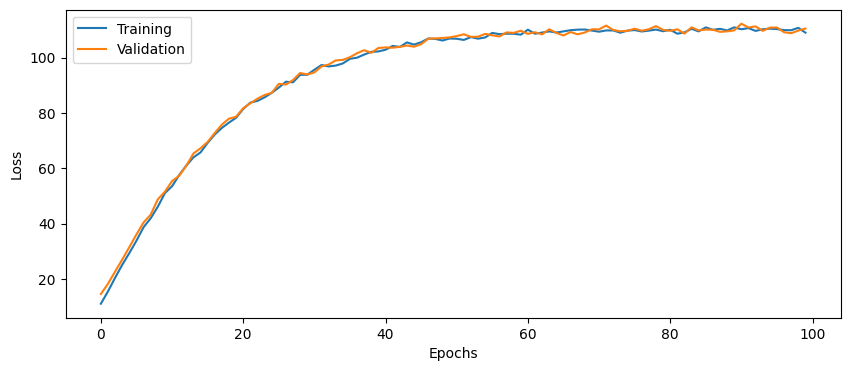

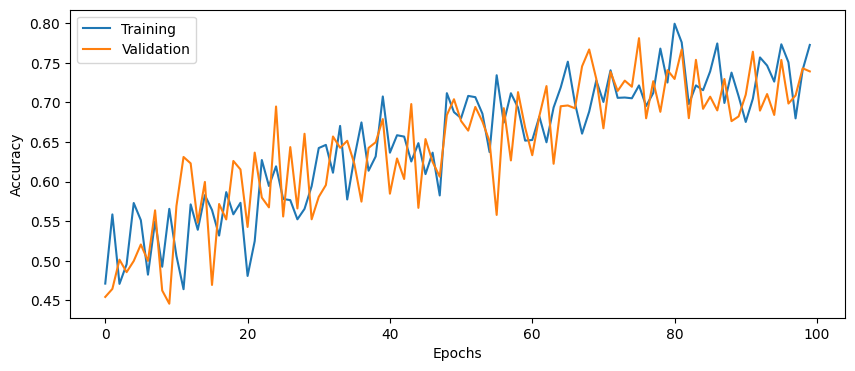

In [12]:
from utilities import plot_results

# Plot the history from the training run
plot_results(history11)

In [13]:
print(model11.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational_8 (Dense  (None, 64)                17722080  
 Variational)                                                    
                                                                 
 dense_variational_9 (Dense  (None, 1)                 2210      
 Variational)                                                    
                                                                 
 dense_variational_10 (Dens  (None, 64)                8384      
 eVariational)                                                   
                                                                 
 dense_variational_11 (Dens  (None, 1)                 2210      
 eVariational)                                                   
                                                                 
Total params: 17734884 (67.65 MB)
Trainable params: 17

In [14]:
score = model11.evaluate(Xtest, Ytest, verbose=0)

print('Test accuracy: %.4f' % score[1])

Test accuracy: 0.7296


As we have done for the MC dropout uncertainty estimation, run the evaluation on the test set 100 times and show the mean and standard deviation.

In [16]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array

n_runs = 100

# Define where to save the test accuracies
test_accuracies = []

for _ in range(n_runs):
    # predict the test set
    pred = model11(Xtest, training=True).numpy().ravel()
    pred_labels = (pred > 0.5).astype(int)
    accuracy = np.mean(pred_labels == Ytest)
    test_accuracies.append(accuracy)

# Calculate and print mean and std of accuracies
mean_acc = np.mean(test_accuracies)
std_acc = np.std(test_accuracies)
print(f"Mean test accuracy over {n_runs} runs: {mean_acc:.4f}")
print(f"Std of test accuracy over {n_runs} runs: {std_acc:.4f}")

# ============================================

Mean test accuracy over 100 runs: 0.7118
Std of test accuracy over 100 runs: 0.2556


# Part 5: DNN for regression

A similar DNN can be used for regression, instead of classification.

#### **<span style="color:red">Questions</span>**
23. How would you change the DNN used in this lab in order to use it for regression instead?

#### **<span style="color:green">Answer</span>**
Instead of using a sigmoid activation, one could use a linear activation (or no activation) so the network can output continuous values. Binary crossentropy loss could be replaced with a regression loss such as MSE/MAE.
Evaluation metrics could be used that are appropriate for regression, like MSE/MAE/R-squared.

## Report

Send in this jupyter notebook, with answers to all questions.